# Machine Learning

## Supervised learning model quality evaluation

In [22]:
# Importing libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Classifiers
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

# Evaluation tools
from sklearn.metrics import ConfusionMatrixDisplay

# CV
from sklearn.model_selection import cross_val_score

In [23]:
from sklearn import datasets
from sklearn import svm

# Loading digit dataset
digits = datasets.load_digits()

In [24]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]], shape=(1797, 64)),
 'target': array([0, 1, 2, ..., 8, 9, 8], shape=(1797,)),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7'

In [25]:
# Exploring the dataset

# print the description
print(digits.DESCR)  

# Assign the data
X = digits.data
y = digits.target

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

### 1. Training VS Testing

ToDo: Fit a models that can classify the 10 classes (10 digits) based on the 64 features. Note that the 64 features are the 64 pixels of each image (8x8). Try with: 1) Decision Trees; 2) k-nearest neightbour; and 3) SVM.

In [26]:
# Randomised split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# fit a Decision Tree Classifier
DT_clf = DecisionTreeClassifier(max_depth=100)
DT_clf.fit(X_train,y_train)


# fit a KNeighborsClassifier
KN_clf = KNeighborsClassifier(n_neighbors=5)
KN_clf.fit(X_train,y_train)

KNeighborsClassifier()

### Model evaluation

In [28]:
# percentage of correct guesses on training dataset
print('DecisionTreeClassifier:',
      '\n\nTraining data:', DT_clf.score(X_train,y_train),
      '\nTest Data:', DT_clf.score(X_test,y_test))

# is it overfit on the training data?
# no not really - fairly accurate


# percentage of correct guesses on training dataset
print('\n\n\nKNeighborsClassifier:',
      '\n\nTraining data:', KN_clf.score(X_train,y_train),
      '\nTest Data:', KN_clf.score(X_test,y_test))

# is it overfit on the training data?
# no not at all, more accurate and generalises less

DecisionTreeClassifier: 

Training data: 1.0 
Test Data: 0.8527777777777777



KNeighborsClassifier: 

Training data: 0.9895615866388309 
Test Data: 0.9861111111111112


### Visualise

### Visualise the data first

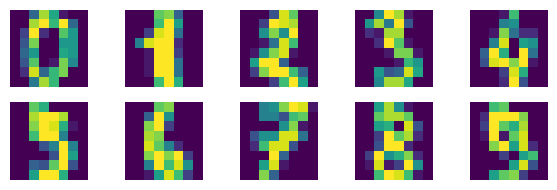

In [29]:
# make subplot
fig, axes = plt.subplots(2, 5, figsize=(6, 2))  

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop over images and plot them
for i in range(10):
    axes[i].imshow(digits.images[i])
    axes[i].axis('off')  


plt.tight_layout()
plt.show()

## Confusion Matrix

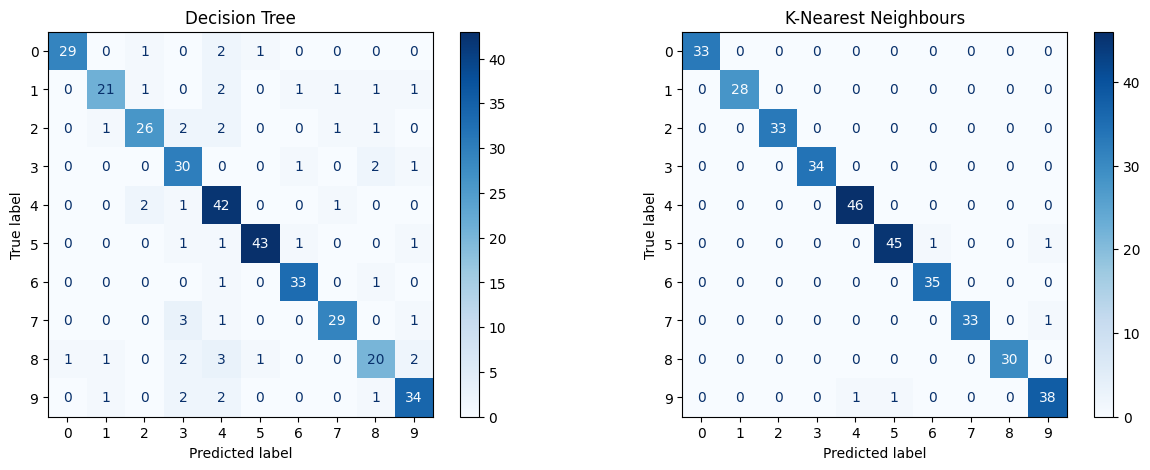

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# plot confusion matrices for each classifier
ConfusionMatrixDisplay.from_estimator(DT_clf, X_test, y_test, ax=axes[0], cmap='Blues')
axes[0].set_title("Decision Tree")

ConfusionMatrixDisplay.from_estimator(KN_clf, X_test, y_test, ax=axes[1], cmap='Blues')
axes[1].set_title("K-Nearest Neighbours")


plt.show()

# Review



In this noetbook I have explored the classification of handwritten digits using multiple supervised learning models. By leveraging scikit-learn's digits dataset, I implemented and evaluated classifiers including k-nearest neighbours and decision trees. Performance evaluation was conducted using cross-validation and confusion matrices, providing insights into model accuracy and misclassification patterns.